In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [10]:
ny_abnb=pd.read_csv(r"C:\Users\frali\Desktop\Data_analysis\new-york-city-airbnb-open-data\AB_NYC_2019.csv")
ny_abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(ny_abnb,test_size=0.2)
test.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4013,2519879,Cozy private room in L.E.S -,10149453,Girish,Manhattan,Lower East Side,40.71934,-73.98196,Private room,110,3,0,NaN,NaN,1,0
21846,17554081,"Large, Sunny, Williamsburg 1 bedroom Apt",119125703,Chris,Brooklyn,Williamsburg,40.70983,-73.96495,Entire home/apt,109,3,73,2019-07-02,2.64,1,37
5479,3967492,East Village Studio Apt.,5160894,Pat,Manhattan,East Village,40.72777,-73.99005,Entire home/apt,129,5,26,2019-06-03,0.58,1,0
17053,13532647,2 Bedroom Apartment in Prime Midtown West,26923140,Allan,Manhattan,Hell's Kitchen,40.76050,-73.99455,Entire home/apt,199,3,110,2019-06-20,3.02,1,246
23327,18889038,Quiet Bedroom in prime Park Slope!,80333891,Mai,Brooklyn,Park Slope,40.67386,-73.98439,Private room,40,7,2,2017-07-21,0.08,2,0
36629,29126674,"HUGE Art-Loft Warehouse in Bushwick, Brooklyn",5759665,Cristóbal,Brooklyn,Bushwick,40.70752,-73.92217,Entire home/apt,120,2,9,2019-04-21,1.03,1,0
10209,7821813,Sunny apartment in Greenpoint,1249116,Eric,Brooklyn,Greenpoint,40.72971,-73.95834,Private room,135,7,2,2015-09-18,0.04,1,0
16951,13490097,Excellent Space for NYC Visit.,9235481,Reynaldo,Manhattan,Washington Heights,40.85413,-73.93172,Private room,45,3,1,2016-07-04,0.03,2,0
43999,33989681,"Cozy, Quintessential Brooklyn Carriage House",235329443,Sophie,Brooklyn,Boerum Hill,40.68438,-73.98436,Entire home/apt,150,3,12,2019-07-06,6.55,1,173
45820,34970126,Urban Zen in Historic Stuyvesant Heights,70773274,Micah,Brooklyn,Bedford-Stuyvesant,40.68414,-73.93538,Entire home/apt,140,6,0,NaN,NaN,1,252


In [30]:
ny_abnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
ny_abnb['neighbourhood'].nunique()

221

In [31]:
len(ny_abnb)

48895

In [35]:
ny_abnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
ny_abnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
ny_abnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [38]:
ny_abnb.fillna({'reviews_per_month':0},inplace=True)
ny_abnb.tail(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48885,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,0.0,2,353
48886,Comfy 1 Bedroom in Midtown East,274311461,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.0,1,176
48887,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,0.0,3,365
48888,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,0.0,1,31
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.0,2,163
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [39]:
ny_abnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [41]:
ny_abnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [42]:
ny_abnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [45]:
top_hosts=ny_abnb.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [46]:
sns.set(rc={'figure.figsize':(10,8)})

In [48]:
sub1=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Brooklyn']
price1=sub1[['price']]
sub2=ny_abnb.plot[['neighbourhood_group']='Manhattan']
pric2=sub2[['price']]
sub3=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Queens']
price3=sub3[['price']]
sub4=ny_abnb.plot[['neighbourhood_group']='Manhattan']
pric4=sub4[['price']]
sub5=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Bronx']
price1=sub5[['price']]
price_list=[pric1,price2,price3,price4,price5]

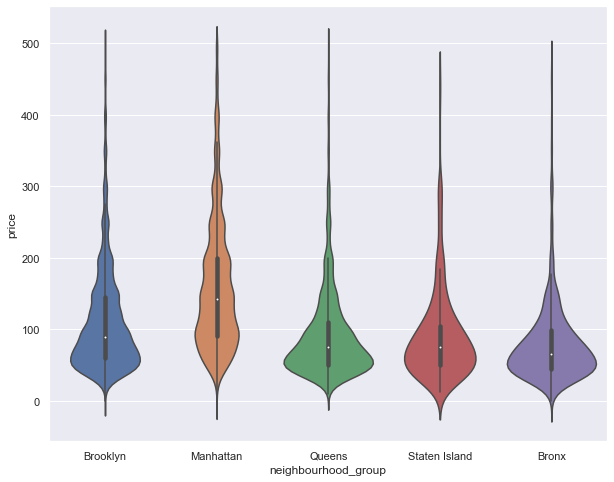

In [52]:
sub6=ny_abnb[ny_abnb.price < 500]
vns=sns.violinplot(data=sub6,x='neighbourhood_group',y='price')

In [57]:
ny_abnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

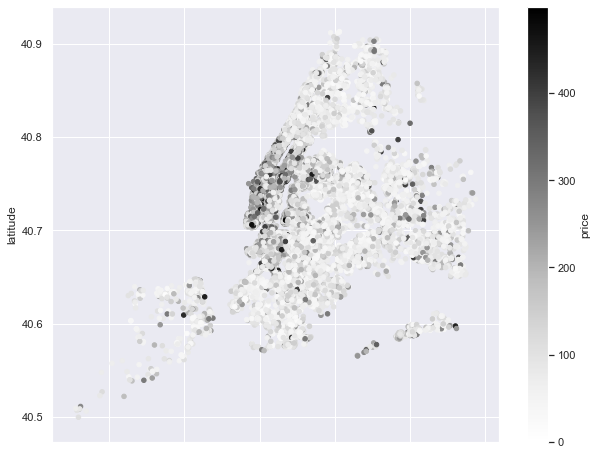

In [65]:
v4=sub6.plot(kind='scatter',x='longitude',y='latitude',c='price',colorbar=True)

In [67]:
top_reviewed=ny_abnb.nlargest(10,'number_of_reviews')
top_reviewed

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [70]:
avg_price=top_reviewed.price.mean()
avg_price

65.4